In [2]:
import numpy as np
import matplotlib.pyplot as plt
import epics as ep
import h5py as h5
from time import sleep
%matplotlib notebook

## Script to scan FE apperature unit openning and measure PBPS waveforms

## User inputs

In [126]:
numShots = 100
numScanSteps = 30
PBPS_name = 'SARFE10-PBPS053'
Scan_range_from = 1
Scan_range_to = 0.05

In [127]:
# PVS
if PBPS_name == 'SARFE10-PBPS053':
    PBPS_base = 'SARFE10-CVME-PHO6212:'
    DU_PV = PBPS_base + 'Lnk9Ch12-DATA-CALIBRATED'
    DU_TX_PV = PBPS_base + 'Lnk9Ch12-TIME-AXIS'
    DU_AMP_PV = PBPS_base + 'Lnk9Ch12-DATA-AMP'
    
    DD_PV = PBPS_base + 'Lnk9Ch13-DATA-CALIBRATED'
    DD_TX_PV = PBPS_base + 'Lnk9Ch13-TIME-AXIS'
    DD_AMP_PV = PBPS_base + 'Lnk9Ch13-DATA-AMP'
    
    
    DR_PV = PBPS_base + 'Lnk9Ch14-DATA-CALIBRATED'
    DR_TX_PV = PBPS_base + 'Lnk9Ch14-TIME-AXIS'
    DR_AMP_PV = PBPS_base + 'Lnk9Ch14-DATA-AMP'
    
    
    DL_PV = PBPS_base + 'Lnk9Ch15-DATA-CALIBRATED'
    DL_TX_PV = PBPS_base + 'Lnk9Ch15-TIME-AXIS'
    DL_AMP_PV = PBPS_base + 'Lnk9Ch15-DATA-AMP'
    
    PBPS_int_PV = PBPS_name+':INTENSITY'
    
    
PulseEnergy_PV = 'SARFE10-PBIG050-EVR0:CALCI'
Slit_h_width_PV = 'SARFE10-OAPU044:MOTOR_W.VAL'
Slit_v_width_PV = 'SARFE10-OAPU044:MOTOR_H.VAL'
Rep_rate_PV = 'SWISSFEL-STATUS:Bunch-1-Appl-Freq-RB'

In [98]:
! pwd

/gfa/.mounts/sf_bernina/config/src/python/photondiag_scripts/PhotonDiagControl/DAQ/PBPS


## Functions

In [128]:
def getval(PV_name):
    return ep.caget(PV_name)
def putval(PV_name,val):
    return ep.caput(PV_name,val)
def findindexabs(dataIn):
    ind = np.argmin(np.abs(dataIn))
    return ind

In [144]:
DU_TX = getval(DU_TX_PV)
DD_TX = getval(DD_TX_PV)
DL_TX = getval(DL_TX_PV)
DR_TX = getval(DR_TX_PV)

DU_WF = []
DD_WF = []
DL_WF = []
DR_WF = []

DU_amp = []
DD_amp = []
DL_amp = []
DR_amp = []

PBPS_int =[]

DU_int = []
DD_int = []
DL_int = []
DR_int = []

PulseEnergy = []

from_time = findindexabs(test_TX-50)
to_time = findindexabs(test_TX-120)

Rep_rate = getval(Rep_rate_PV)

scan_vals = np.linspace(Scan_range_from, Scan_range_to,numScanSteps)

for j in scan_vals:
    putval(Slit_h_width_PV, j)
    sleep(1)
    putval(Slit_v_width_PV, j)
    sleep(2)
    
    current_DU_WF=[]
    current_DD_WF=[]
    current_DL_WF=[]
    current_DR_WF=[]
    
    current_DU_amp=[]
    current_DD_amp=[]
    current_DL_amp=[]
    current_DR_amp=[]
    
    current_DU_int =[]
    current_DD_int =[]
    current_DR_int =[]
    current_DL_int =[]
    
    current_PulseEnergy = []
    current_PBPS_int = []
    
    # get value
    for i in range(0,numShots):
        tmp_DU_WF = getval(DU_PV)
        tmp_DD_WF = getval(DD_PV)
        tmp_DL_WF = getval(DL_PV)
        tmp_DR_WF = getval(DR_PV)
        
        current_PulseEnergy.append(getval(PulseEnergy_PV))
        current_PBPS_int.append(getval(PBPS_int_PV))

        current_DU_WF.append(tmp_DU_WF)
        current_DD_WF.append(tmp_DD_WF)
        current_DL_WF.append(tmp_DL_WF)
        current_DR_WF.append(tmp_DR_WF)
        
        current_DU_amp.append(getval(DU_AMP_PV))
        current_DD_amp.append(getval(DD_AMP_PV))
        current_DL_amp.append(getval(DL_AMP_PV))
        current_DR_amp.append(getval(DR_AMP_PV))

        current_DU_int.append(np.sum(tmp_DU_WF[from_time:to_time]))
        current_DD_int.append(np.sum(tmp_DD_WF[from_time:to_time]))
        current_DR_int.append(np.sum(tmp_DR_WF[from_time:to_time]))
        current_DL_int.append(np.sum(tmp_DL_WF[from_time:to_time]))

        sleep(1/Rep_rate)
    
    DU_WF.append(current_DU_WF)
    DD_WF.append(current_DD_WF)
    DL_WF.append(current_DL_WF)
    DR_WF.append(current_DR_WF)
    
    DU_amp.append(current_DU_amp)
    DD_amp.append(current_DD_amp)
    DL_amp.append(current_DL_amp)
    DR_amp.append(current_DR_amp)
    
    DU_int.append(current_DU_int)
    DD_int.append(current_DD_int)
    DL_int.append(current_DL_int)
    DR_int.append(current_DR_int)
    
    PulseEnergy.append(current_PulseEnergy)
    PBPS_int.append(current_PBPS_int)
    
DU_WF = np.asarray(DU_WF)
DD_WF = np.asarray(DD_WF)
DL_WF = np.asarray(DL_WF)
DR_WF = np.asarray(DR_WF)

DU_int = np.asarray(DU_int)
DD_int = np.asarray(DD_int)
DL_int = np.asarray(DL_int)
DR_int = np.asarray(DR_int)

DU_amp = np.asarray(DU_amp)
DD_amp = np.asarray(DD_amp)
DL_amp = np.asarray(DL_amp)
DR_amp = np.asarray(DR_amp)

PulseEnergy = np.asarray(PulseEnergy)

In [145]:
DataOut ={
    "DU_WF":DU_WF,
    "DD_WF":DD_WF,
    "DL_WF":DL_WF,
    "DR_WF":DR_WF,
    "DU_int":DU_int,
    "DD_int":DD_int,
    "DL_int":DL_int,
    "DR_int":DR_int,
    "DU_amp":DU_amp,
    "DD_amp":DD_amp,
    "DL_amp":DL_amp,
    "DR_amp":DR_amp,
    "PulseEnergy":PulseEnergy,
    "PBPS_int": PBPS_int,
    "from_time":from_time,
    "to_time":to_time
}

In [146]:
SaveFn = 'Scan08.h5'

In [147]:
with h5.File(SaveFn,'w-') as fh:
    for k,v in DataOut.items():
        fh[k] = v

In [67]:
DU_WF[:,:,from_time:to_time].sum(axis=2).shape

(10, 100)

<IPython.core.display.Javascript object>


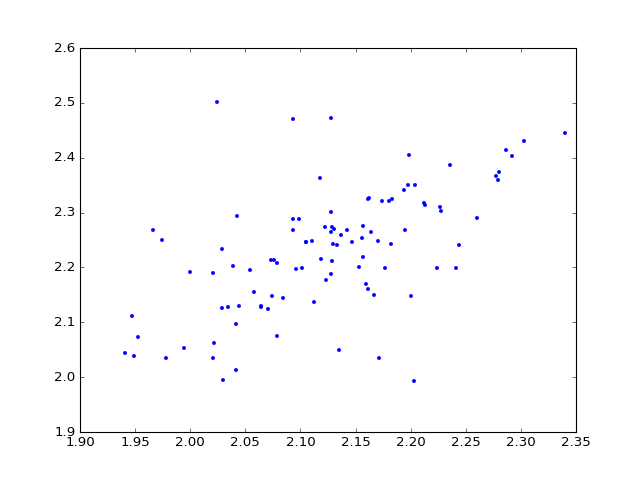

In [71]:
plt.figure()
plt.plot(DD_WF[1,:,from_time:to_time].sum(axis=1),DU_WF[1,:,from_time:to_time].sum(axis=1),'.')

<IPython.core.display.Javascript object>


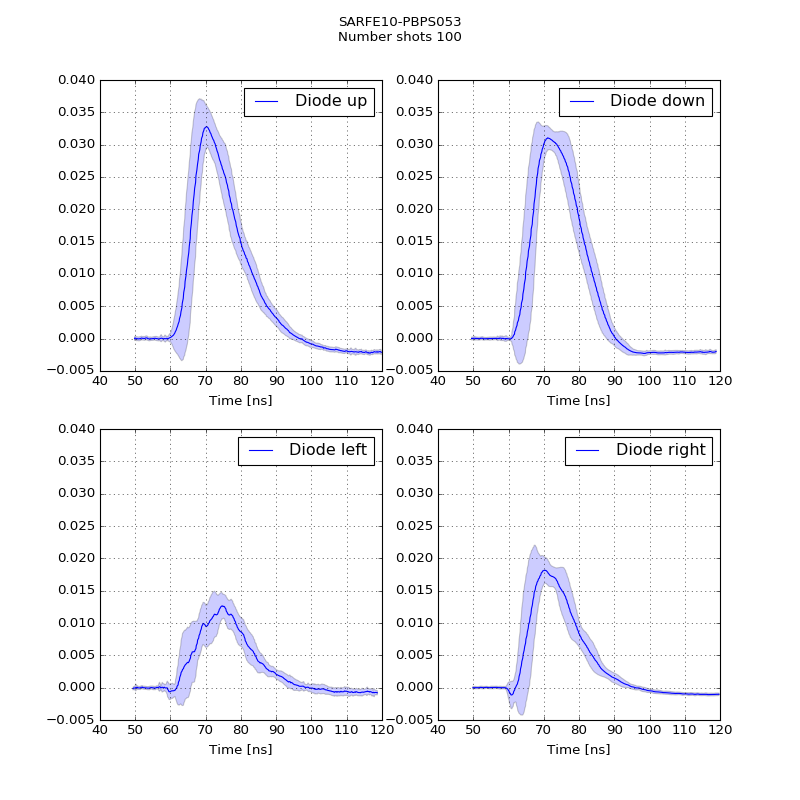

In [44]:
ylims = [-.005, 0.04]
plt.figure(figsize=(10,10))
plt.suptitle(PBPS_name+'\nNumber shots %.0f'%numShots)
plt.subplot(221)
plt.plot(DU_TX[from_time:to_time],DU_WF[:,from_time:to_time].mean(axis=0), label = 'Diode up')
plt.fill_between(DU_TX[from_time:to_time],DU_WF[:,from_time:to_time].mean(axis=0)-DU_WF[:,from_time:to_time].std(axis=0),DU_WF[:,from_time:to_time].mean(axis=0)+DU_WF[:,from_time:to_time].std(axis=0), alpha = 0.2)
plt.legend()
plt.ylim(ylims)
plt.grid(True)
plt.xlabel('Time [ns]')

plt.subplot(222)
plt.plot(DD_TX[from_time:to_time],DD_WF[:,from_time:to_time].mean(axis=0), label = 'Diode down')
plt.fill_between(DD_TX[from_time:to_time],DD_WF[:,from_time:to_time].mean(axis=0)-DD_WF[:,from_time:to_time].std(axis=0),DD_WF[:,from_time:to_time].mean(axis=0)+DD_WF[:,from_time:to_time].std(axis=0), alpha = 0.2)
plt.legend()
plt.ylim(ylims)
plt.grid(True)
plt.xlabel('Time [ns]')

plt.subplot(223)
plt.plot(DL_TX[from_time:to_time],DL_WF[:,from_time:to_time].mean(axis=0), label = 'Diode left')
plt.fill_between(DL_TX[from_time:to_time],DL_WF[:,from_time:to_time].mean(axis=0)-DL_WF[:,from_time:to_time].std(axis=0),DL_WF[:,from_time:to_time].mean(axis=0)+DL_WF[:,from_time:to_time].std(axis=0), alpha = 0.2)
plt.legend()
plt.ylim(ylims)
plt.grid(True)
plt.xlabel('Time [ns]')

plt.subplot(224)
plt.plot(DR_TX[from_time:to_time],DR_WF[:,from_time:to_time].mean(axis=0), label = 'Diode right')
plt.fill_between(DR_TX[from_time:to_time],DR_WF[:,from_time:to_time].mean(axis=0)-DR_WF[:,from_time:to_time].std(axis=0),DR_WF[:,from_time:to_time].mean(axis=0)+DR_WF[:,from_time:to_time].std(axis=0), alpha = 0.2)
plt.legend()
plt.ylim(ylims)
plt.grid(True)
plt.xlabel('Time [ns]')
# plt.savefig("Waveform avg", dpi = 300)